#**Mushrooms: Poisonous or Edible?**
## Identifying Poisonous vs. Edible Mushrooms

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Relevant information:
	This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms
	per species). Each mushroom is identified as definitely edible, definitely poisonous, or of 
	unknown edibility and not recommended (the latter class was combined with the poisonous class).
	Of the 20 variables, 17 are nominal and 3 are metrical.


In [ ]:
df = pd.read_csv('secondary_data.csv', delimiter=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


  Class information:
	1. class		poisonous=p, edibile=e (binary)

  Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            
                                bell=b, conical=c, convex=x, flat=f,
                                sunken=s, spherical=p, others=o
   3. cap-surface (n):          
                                fibrous=i, grooves=g, scaly=y, smooth=s,
								shiny=h, leathery=l, silky=k, sticky=t,
								wrinkled=w, fleshy=e
   4. cap-color (n):            
                                brown=n, buff=b, gray=g, green=r, pink=p,
								purple=u, red=e, white=w, yellow=y, blue=l, 
								orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      
                                adnate=a, adnexed=x, decurrent=d, free=e, 
								sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           
                                bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           
                             cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							    large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             
                                grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w

In [ ]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df.tail()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.17,s,s,y,f,f,f,f,3.25,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [ ]:
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

There are three numerical features: cap-diameter, stem-height, and stem-width. Let's look at their summary statistics and plot relationships between these variables.

In [ ]:
df.corr()

,cap-diameter,stem-height,stem-width
cap-diameter,1.00000,0.422560,0.695330
stem-height,0.42256,1.000000,0.436117
stem-width,0.69533,0.436117,1.000000


In [ ]:
nums=['cap-diameter','stem-height','stem-width']

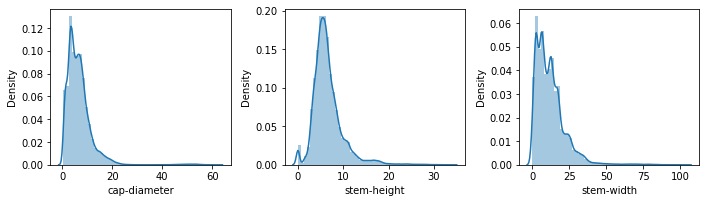

In [ ]:
# Making multiple subplots
rows=3
cols=3
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

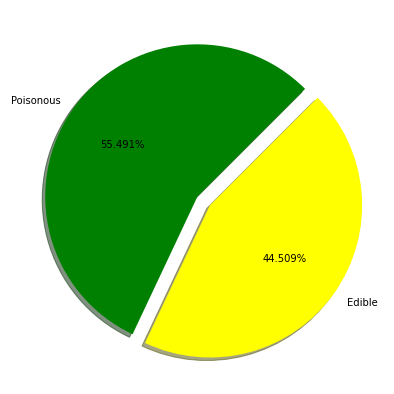

In [ ]:
fig = plt.figure(figsize=(7,7)) #width and height
colours = ["green", "yellow"]
Poisonous = df[df['class']== 'p']
Edible = df[df['class']== 'e']
Hazard_ratio = [Poisonous['class'].count(),Edible['class'].count()] # To count p and e rows in column-'class'
Mushroom_Pie = plt.pie(Hazard_ratio, #to plot pie chart
                 labels= ['Poisonous', 'Edible'], 
                 autopct ='%.3f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45,
                 explode=(0, 0.1))

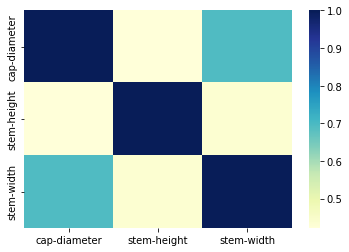

In [ ]:
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

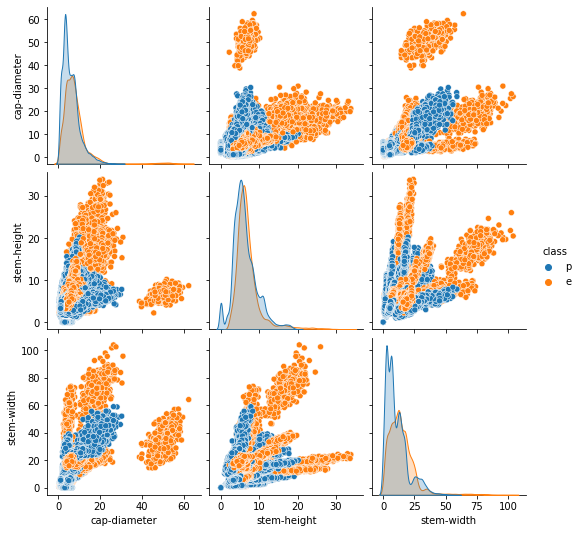

In [ ]:
sns.pairplot(df[nums+['class']],hue='class')

Text(0.5, 1.0, 'mushroom distribution acc to ring type')

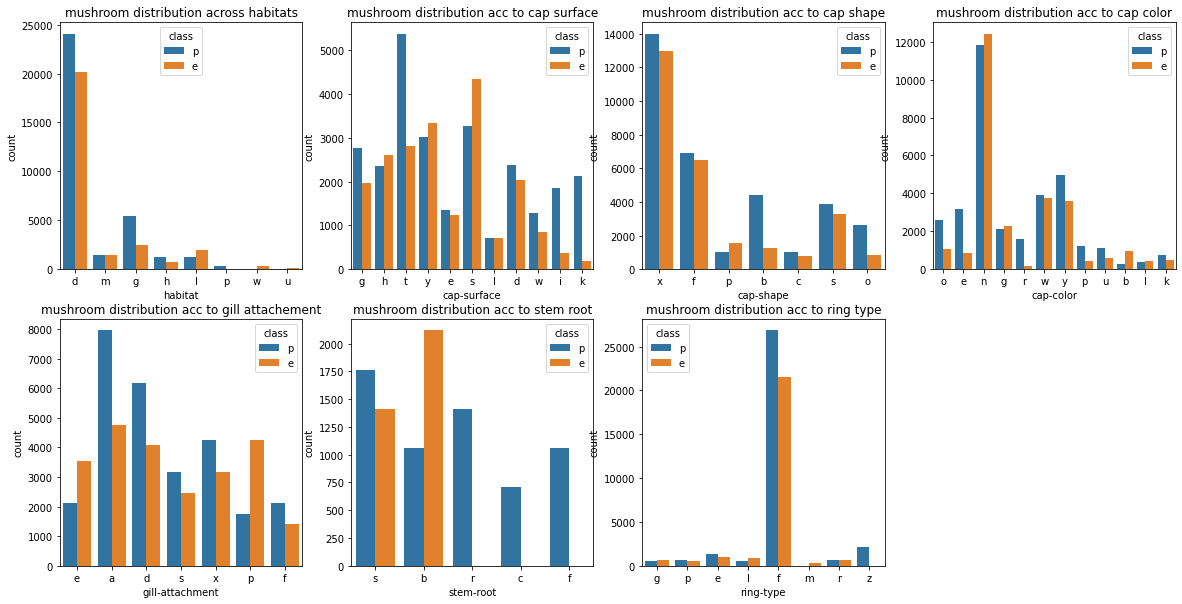

In [ ]:
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(2,4,1)
sns.countplot(x = "habitat", hue="class", data = df, ax=ax1)
plt.title('mushroom distribution across habitats')

ax2 = fig.add_subplot(2,4,2)
sns.countplot(x = 'cap-surface', hue="class", data = df, ax=ax2)
plt.title('mushroom distribution acc to cap surface')

ax3 = fig.add_subplot(2,4,3)
sns.countplot(x = 'cap-shape', hue="class", data = df, ax=ax3)
plt.title('mushroom distribution acc to cap shape')

ax4 = fig.add_subplot(2,4,4)
sns.countplot(x = 'cap-color', hue="class", data = df, ax=ax4)
plt.title('mushroom distribution acc to cap color')

ax5 = fig.add_subplot(2,4,5)
sns.countplot(x = 'gill-attachment', hue="class", data = df, ax=ax5)
plt.title('mushroom distribution acc to gill attachement')

ax6 = fig.add_subplot(2,4,6)
sns.countplot(x = 'stem-root', hue="class", data = df, ax=ax6)
plt.title('mushroom distribution acc to stem root')

ax7 = fig.add_subplot(2,4,7)
sns.countplot(x = 'ring-type', hue="class", data = df, ax=ax7)
plt.title('mushroom distribution acc to ring type')

In [ ]:
sns.countplot(x = "habitat", hue="class", data = df)
plt.title('mushroom distribution across habitats')

* Deciduous habitats have the most mushrooms poisonous and non-poisonous.
* urban habitats have the least mushrooms present.




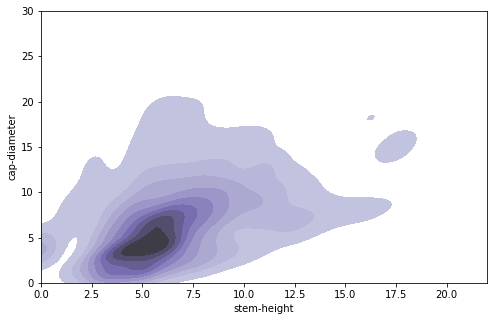

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim([0,22])
ax.set_ylim([0,30])
ax = sns.kdeplot(x=df['stem-height'], y=df['cap-diameter'],
                 cmap="Purples_d", shade=True)

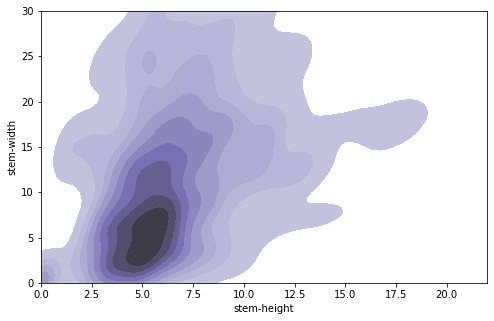

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim([0,22])
ax.set_ylim([0,30])
ax = sns.kdeplot(x=df['stem-height'], y=df['stem-width'],
                 cmap="Purples_d", shade=True)

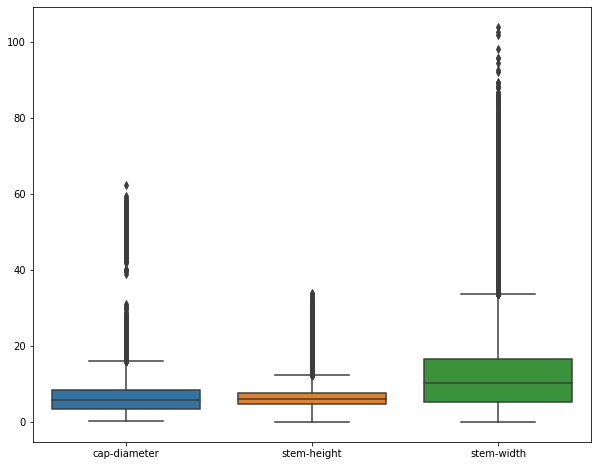

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df[['cap-diameter', 'stem-height', 'stem-width']])


In [ ]:
sns.lmplot(x='cap-diameter', y='stem-height', data=df, hue='cap-shape',fit_reg=False)                                          
x=np.arange(0,200,50)
Y=np.arange(0,200,50)

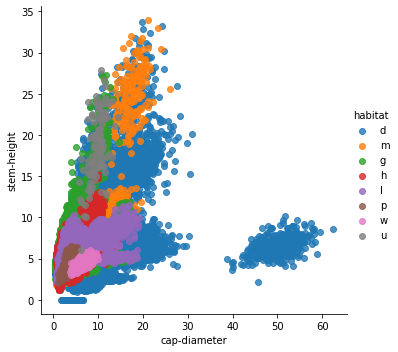

In [ ]:
sns.lmplot(x='cap-diameter', y='stem-height', data=df,
           fit_reg=False, 
           hue='habitat')
 x=np.arange(0,200,50)
Y=np.arange(0,200,50)

In [ ]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
  
# Converting type of columns to category
df['cap-surface']=df['cap-surface'].astype('category')
df['cap-shape']=df['cap-shape'].astype('category')
  
  
#Assigning numerical values and storing it in another columns
df['csurf_new']=df['cap-surface'].cat.codes
df['cshape_new']=df['cap-shape'].cat.codes 

#Create an instance of One-hot-encoder
enc=OneHotEncoder()
  
#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method 
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we 
have huge  number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(df[['csurf_new','cshape_new']]).toarray())
  
#Merge with main
New_df=df.join(enc_data)
  
print(New_df)



       class  cap-diameter cap-shape cap-surface cap-color  \
0          1         15.26         x           g         o   
1          1         16.60         x           g         o   
2          1         14.07         x           g         o   
3          1         14.17         f           h         e   
4          1         14.64         x           h         o   
...      ...           ...       ...         ...       ...   
61064      1          1.18         s           s         y   
61065      1          1.27         f           s         y   
61066      1          1.27         s           s         y   
61067      1          1.24         f           s         y   
61068      1          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e   

In [ ]:
#df.drop(['gill-attachment', 'gill-color', 'does-bruise-or-bleed','cap-color'], axis=1,inplace= True)
df.drop(['stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season','cap-shape','cap-surface'], axis=1,inplace= True)

In [ ]:
df

,class,cap-diameter,stem-height,stem-width,csurf_new,cshape_new
0,1,15.26,16.95,17.09,2,6
1,1,16.60,17.99,18.19,2,6
2,1,14.07,17.80,17.74,2,6
3,1,14.17,15.77,15.98,3,2
4,1,14.64,16.53,17.20,3,6
...,...,...,...,...,...,...
61064,1,1.18,3.93,6.22,7,5
61065,1,1.27,3.18,5.43,7,2
61066,1,1.27,3.86,6.37,7,5
61067,1,1.24,3.56,5.44,7,2


In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = df.drop(columns='class')
Y=df.loc[:,'class']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,train_size=0.75)

In [ ]:
# Pre-processing: Normalization / Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() # Machine Instance
train_scaled=pd.DataFrame(sc.fit_transform(X_train)) # Scaling the train set
test_scaled=pd.DataFrame(sc.transform(X_test)) # Scaling the test set

In [ ]:
# Importing Decision Tree Classifier for predictions and accuracy_score to check accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
model=DecisionTreeClassifier() # Machine Instance
model.fit(train_scaled,Y_train) # Traing the model

dt_predictions_train=model.predict(train_scaled) # Predicting for train set
dt_acc_train=accuracy_score(Y_train,dt_predictions_train) # Calculating accuracy


dt_predictions_test=model.predict(test_scaled) # Predicting on test set
dt_acc_test=accuracy_score(Y_test,dt_predictions_test) # Calculating accuracy

In [ ]:
print('Accuracy of predictions on train data:',round(dt_acc_train*100,2),'%')
print('Accuracy of predictions on test data:',round(dt_acc_test*100,2),'%')

Accuracy of predictions on train data: 100.0 %
Accuracy of predictions on test data: 94.78 %


In [ ]:
print(classification_report(Y_test,dt_predictions_test ))
cf_matrix_1 = confusion_matrix(Y_test,dt_predictions_test)
print(cf_matrix_1)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6679
           1       0.96      0.95      0.95      8589

    accuracy                           0.95     15268
   macro avg       0.95      0.95      0.95     15268
weighted avg       0.95      0.95      0.95     15268

[[6319  360]
 [ 437 8152]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier() # Machine Instance
model_rf.fit(train_scaled,Y_train)# Training the model

# Predictions made
Rf_predict_train=model_rf.predict(train_scaled)
Rf_predict_test=model_rf.predict(test_scaled)

# accuracy calculation
Rf_acc_train=accuracy_score(Rf_predict_train,Y_train)
Rf_acc_test=accuracy_score(Rf_predict_test,Y_test)

In [ ]:
print('Accuracy of predictions on Train set:',round(Rf_acc_train*100,2),'%')
print('Accuracy of predictions on Test set:',round(Rf_acc_test*100,2),'%')

Accuracy of predictions on Train set: 100.0 %
Accuracy of predictions on Test set: 96.64 %


In [ ]:
print(classification_report(Y_test,Rf_predict_test ))
cf_matrix_3 = confusion_matrix(Y_test,Rf_predict_test)
print(cf_matrix_3)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6679
           1       0.98      0.96      0.97      8589

    accuracy                           0.97     15268
   macro avg       0.97      0.97      0.97     15268
weighted avg       0.97      0.97      0.97     15268

[[6472  207]
 [ 306 8283]]
